# **Topic: Analysis of Outcome of Indian General Elections 2024**

In this experiment, we study and analyse some of the many attributes of the Indian General Elections 2024. All the data collected is from the Election Commission of India, which can be found here: https://results.eci.gov.in/PcResultGenJune2024/index.htm
Certain parties have been categorized based on their affiliations (NDA, INDIA, etc.) as per https://en.wikipedia.org/wiki/List_of_political_parties_in_India#cite_note-National_parties-1, as the official government page is not available for public view as of writing this



Summary statistics:

Seats won:
Mean: 59.42857142857143
Median: 29
Standard deviation: 86.5579904704685
Variance: 7492.285714285715

Change in seats:
Mean: 1.1428571428571428
Median: 3
Standard deviation: 35.53134096085019
Variance: 1262.4761904761904

Vote share (%):
Mean: 10.534714285714285
Median: 4.415
Standard deviation: 13.542893077358395
Variance: 183.40995290476192

Victory margins (%):
Mean: 5.557142857142857
Median: 5.4
Standard deviation: 4.104817146904818
Variance: 16.84952380952381


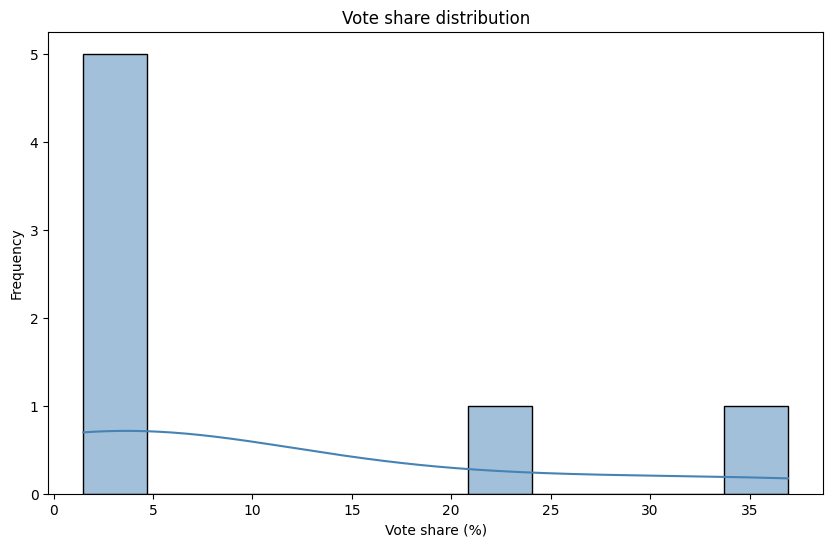


Descriptive Stats for Victory margins:
Mean: 5.557142857142857
Median: 5.4
Standard Deviation: 4.104817146904818
Variance: 16.84952380952381


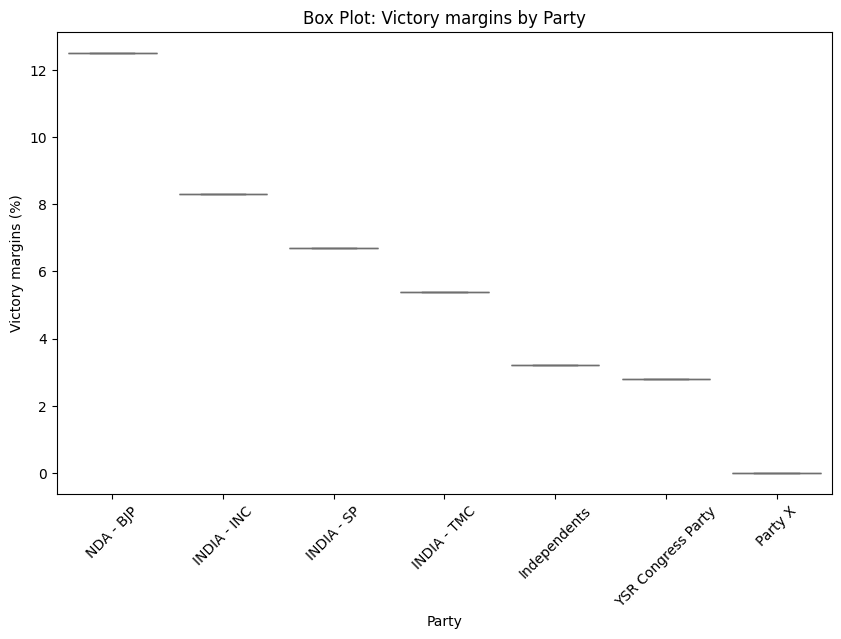

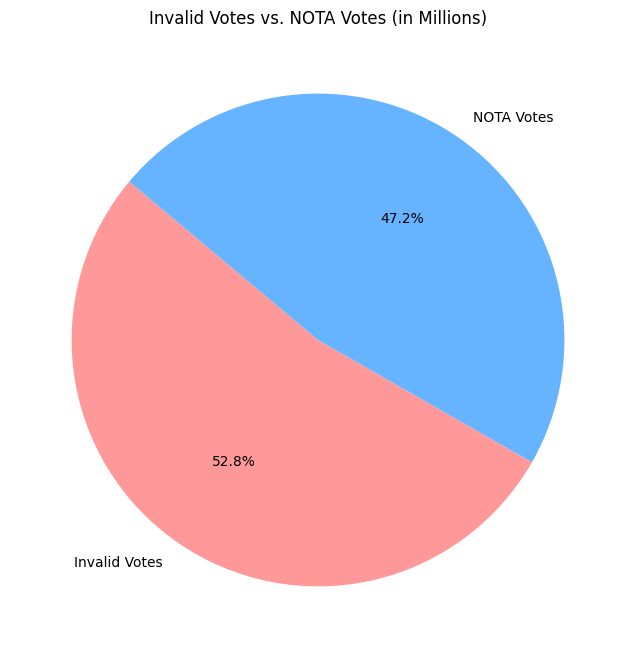

Linear regression R^2 score: -3.486931935117946
Logistic Regression Coefficients: [[0.77633059]]


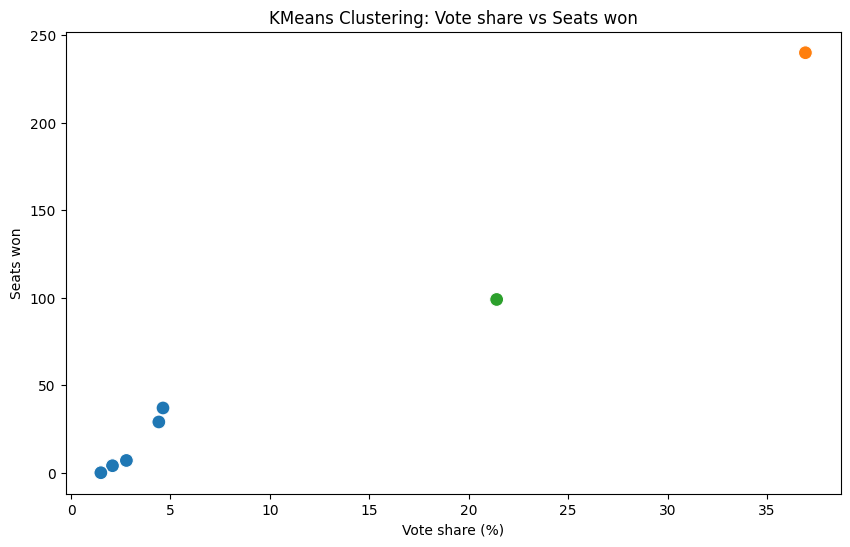

T-Statistic: 2.3793533568621728, P-Value: 0.14037888501883974


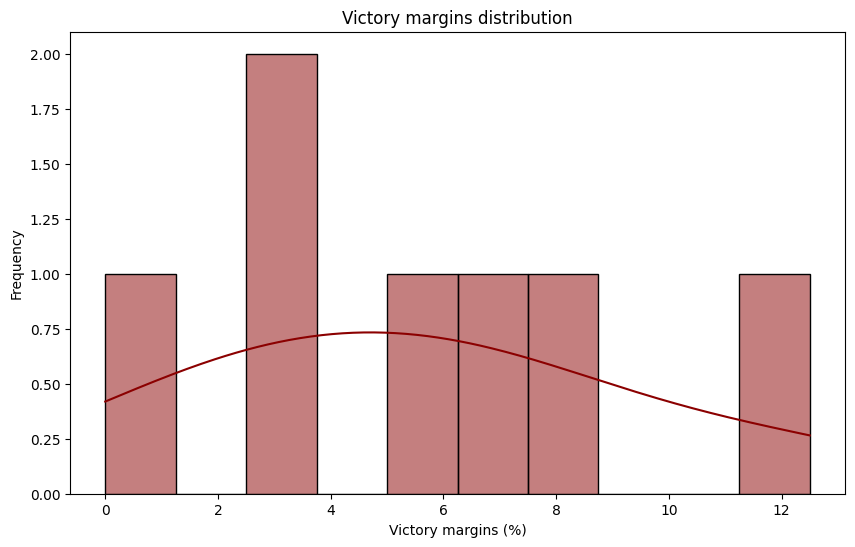

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics as stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

# Sample data
data = {
    "Party": [
        "NDA - BJP",
        "INDIA - INC",
        "INDIA - SP",
        "INDIA - TMC",
        "Independents",
        "YSR Congress Party",
        "Party X",
    ],
    "Seats won": [240, 99, 37, 29, 7, 4, 0],
    "Change in seats": [-63, 47, 32, 7, 3, -18, 0],
    "Vote share (%)": [36.932, 21.404, 4.624, 4.415, 2.784, 2.084, 1.5],
    "Victory margins (%)": [12.5, 8.3, 6.7, 5.4, 3.2, 2.8, 0.0],
    "Invalid Votes (M)": [2.5, 1.8, 0.9, 0.7, 0.3, 0.2, 0.1],
    "NOTA Votes (M)": [2.2, 1.7, 0.8, 0.6, 0.3, 0.1, 0.1],
}

df = pd.DataFrame(data)

# Data Exploration
print("Summary statistics:")

for column in ["Seats won", "Change in seats", "Vote share (%)", "Victory margins (%)"]:
    print(f"\n{column}:")
    print(f"Mean: {stats.mean(df[column])}")
    print(f"Median: {stats.median(df[column])}")
    print(f"Standard deviation: {stats.stdev(df[column])}")
    print(f"Variance: {stats.variance(df[column])}")

# Distributions
# Vote share Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Vote share (%)"], kde=True, bins=11, color="steelblue")
plt.title("Vote share distribution")
plt.xlabel("Vote share (%)")
plt.ylabel("Frequency")
plt.show()

# Victory margins by Party
print(f"\nDescriptive Stats for Victory margins:")
print(f"Mean: {stats.mean(df['Victory margins (%)'])}")
print(f"Median: {stats.median(df['Victory margins (%)'])}")
print(f"Standard Deviation: {stats.stdev(df['Victory margins (%)'])}")
print(f"Variance: {stats.variance(df['Victory margins (%)'])}")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Party", y="Victory margins (%)", data=df, color="skyblue")
plt.title("Box Plot: Victory margins by Party")
plt.xlabel("Party")
plt.ylabel("Victory margins (%)")
plt.xticks(rotation=45)
plt.show()

# Invalid Votes vs. NOTA Votes
invalid_votes_total = df["Invalid Votes (M)"].sum()
nota_votes_total = df["NOTA Votes (M)"].sum()
pie_data = [invalid_votes_total, nota_votes_total]
labels = ["Invalid Votes", "NOTA Votes"]
colors = ["#ff9999", "#66b3ff"]

plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Invalid Votes vs. NOTA Votes (in Millions)")
plt.show()

# Mathematical Models
#Linear Regression: Vote share vs. Seats won
X = df[["Vote share (%)"]]
y = df["Seats won"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("Linear regression R^2 score:", model.score(X_test, y_test))

#Logistic Regression: Predict Wins (with non-winners included)
df["Wins"] = (df["Seats won"] > 0).astype(int)  # Binary Target (0 = non-winner, 1 = winner)
X = df[["Vote share (%)"]]
y = df["Wins"]

log_model = LogisticRegression()
log_model.fit(X, y)
print("Logistic Regression Coefficients:", log_model.coef_)

# 3. Clustering Parties
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Vote share (%)", "Seats won"]])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Vote share (%)", y="Seats won", hue="Cluster", data=df, palette="tab10", s=100, legend=False
)
plt.title("KMeans Clustering: Vote share vs Seats won")
plt.xlabel("Vote share (%)")
plt.ylabel("Seats won")
plt.show()

# 4. Hypothesis Testing: NDA vs. INDIA Vote share
nda = df[df["Party"].str.contains("NDA")]["Vote share (%)"]
india = df[df["Party"].str.contains("INDIA")]["Vote share (%)"]

t_stat, p_value = ttest_ind(nda, india)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Insights
# Victory margins
plt.figure(figsize=(10, 6))
sns.histplot(df["Victory margins (%)"], kde=True, color="darkred", bins=10)
plt.title("Victory margins distribution")
plt.xlabel("Victory margins (%)")
plt.ylabel("Frequency")
plt.show()

 Party X is the added non-winner to ensure that logistic regression model runs efficiently (because otherwise, the model will try to predict the binary outcome (win vs. not win) for a dataset that only has winners (class 1) and no losers (class 0).) The other parties are **NDA-BJP, INDIA-INC,  INDIA-SP,  INDIA-TMC, Independents, and YSRCP** (YSR Congress Party)




The attributes we will cover for each of these Parties are Seats won, Change in seats (both positive and negative), Vote share, Victory margins, Invalid Votes, and NOTA Votes.

The statistics summary highlights high variability in seat wins, with a mean of 59.43 and a standard deviation of 86.56. The median of 29 is lower than the mean, indicating a positively skewed distribution. The high variance (7492.29) reflects the overwhelming advantage of certain parties.

It is also seen that the mean change in seats is only 1.14, suggesting that, on average, the net change in seats for parties is minor (this is likely due to opposing gains and losses averaging out). The standard deviation (35.53) and variance (1262.48) reflect great shifts in voter support between elections.

The mean vote share is 10.53%, indicating that most parties get a modest share of votes. The median (4.415%) is much lower than the mean, suggesting that a small number of parties achieve very high vote shares while most remain minor players, which is in agreement with our earlier observation.

We can also infer that the standard deviation (4.10) and variance (16.85) suggest less variability in victory margins compared to other metrics, implying that most constituencies see competitive elections. Also, the mean (5.56%) and median (5.4%) are close, indicating a roughly symmetric distribution of victory margins.

R² (-3.487) indicates that the linear regression model fits the data worse than a horizontal line (mean of the dependent variable). Meaning, the independent variables used in the regression have little or no explanatory power for the dependent variable in the election context.

The logistic regression coefficient (0.776) shows that
the odds of winning increase by a factor of 𝑒^0.776 ≈ 2.17 for every 1% increase in vote share. In other words, a higher vote share strongly predicts winning a seat

T-Statistic (2.379) helps visualise the difference between the two groups (NDA and INDIA) in terms of vote share, standardized by variability.

The p-value (0.140) indicates that the observed difference between NDA and INDIA vote shares is not statistically significant at the conventional 5% level (𝑝 < 0.05)

First few rows of the dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_de

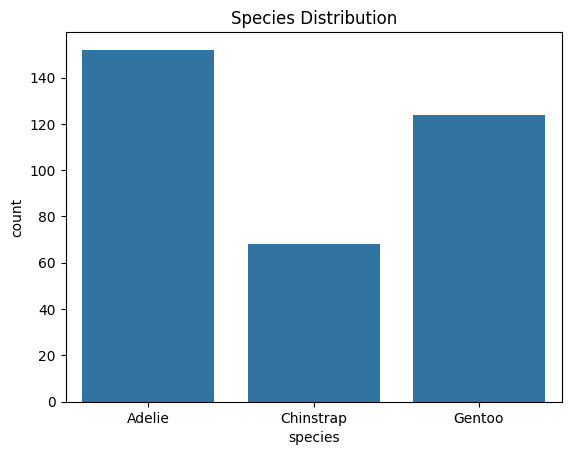

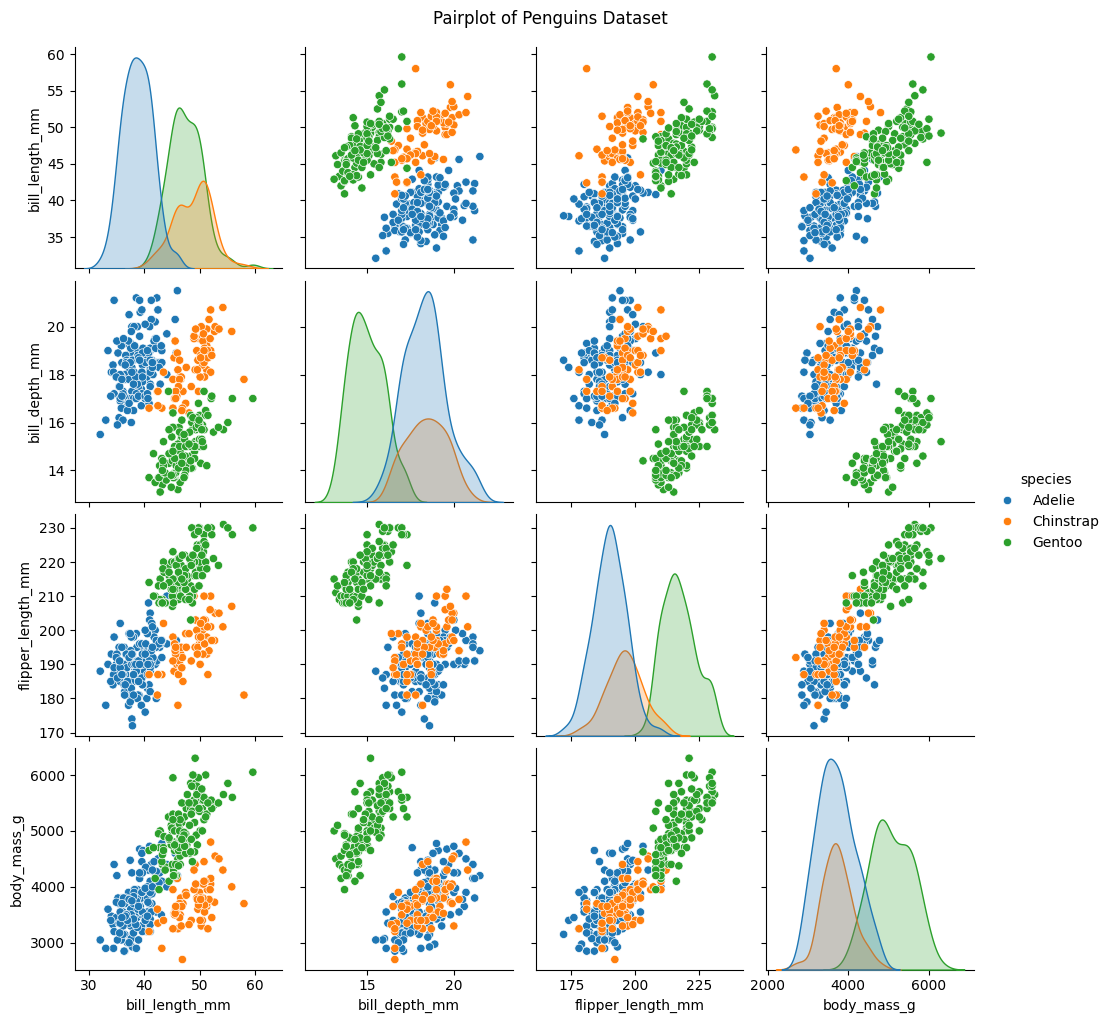

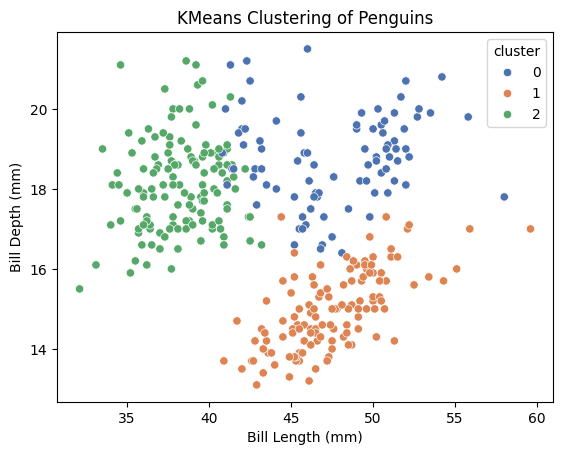

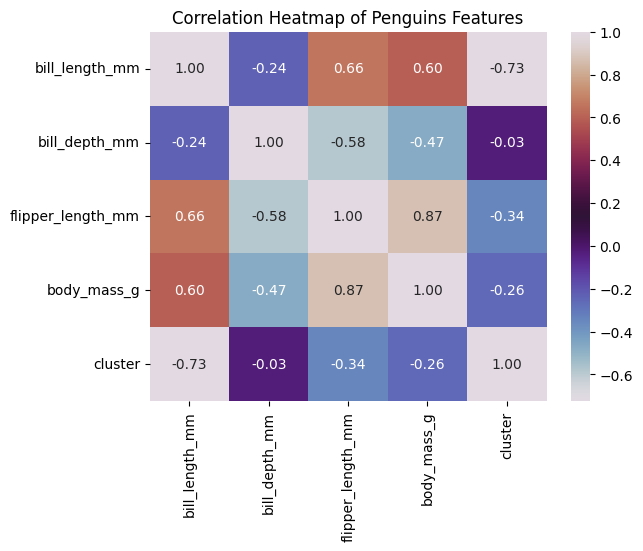

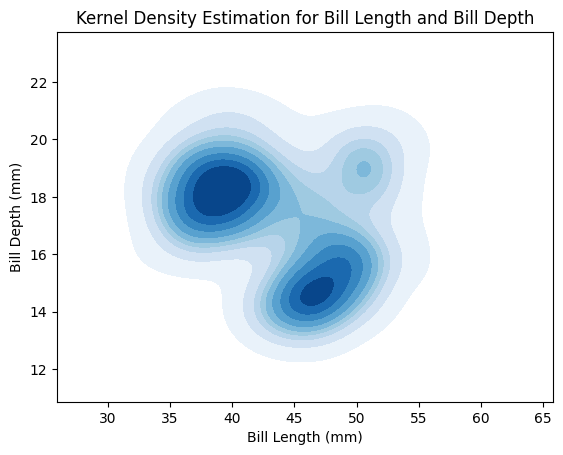


Mean Bill Length and Depth by Species:
           bill_length_mm  bill_depth_mm
species                                 
Adelie          38.791391      18.346358
Chinstrap       48.833824      18.420588
Gentoo          47.504878      14.982114

Suggestions for species prediction:
1. Use classification algorithms like Decision Trees, Random Forests, or Logistic Regression.
2. Explore more advanced methods like Neural Networks or Support Vector Machines.
3. Utilize features like flipper length and body mass to improve prediction accuracy.


In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Step 2: Summarize the dataset
print("First few rows of the dataset:")
print(penguins.head())
print("\nDataset Summary:")
print(penguins.info())
print("\nStatistical Summary:")
print(penguins.describe())

# Step 3: Perform Exploratory Data Analysis (EDA)
print("\nChecking for missing values:")
print(penguins.isnull().sum())

# Plot the distribution of species
sns.countplot(data=penguins, x="species")
plt.title("Species Distribution")
plt.savefig("species_distribution.png")
plt.show()

# Pairplot for visualizing relationships between numerical features
sns.pairplot(penguins, hue="species", diag_kind="kde")
plt.suptitle("Pairplot of Penguins Dataset", y=1.02)
plt.savefig("pairplot_penguins.png")
plt.show()

# Step 4: Identify clusters
# Drop non-numeric columns and handle missing values
penguins_cleaned = penguins.drop(columns=["island", "sex"]).dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins_cleaned.drop(columns=["species"]))

# Use KMeans to identify clusters
kmeans = KMeans(n_clusters=3, random_state=42)
penguins_cleaned["cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(
    x=penguins_cleaned["bill_length_mm"],
    y=penguins_cleaned["bill_depth_mm"],
    hue=penguins_cleaned["cluster"],
    palette="deep"
)
plt.title("KMeans Clustering of Penguins")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.savefig("clusters_visualization.png")
plt.show()

# Step 5: Generate a Heatmap of Correlations
# Select only numerical features for correlation calculation
numerical_features = penguins_cleaned.select_dtypes(include=['number'])  # Select numerical columns
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="twilight", fmt=".2f")
plt.title("Correlation Heatmap of Penguins Features")
plt.savefig("heatmap_correlation.png")
plt.show()

# Step 6: Kernel Density Estimation (KDE) Plot for bill length and bill depth
sns.kdeplot(data=penguins_cleaned, x="bill_length_mm", y="bill_depth_mm", fill=True, cmap="Blues")
plt.title("Kernel Density Estimation for Bill Length and Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.savefig("kde_plot.png")
plt.show()

# Step 7: Predict species based on features
# Encode species as labels
label_encoder = LabelEncoder()
penguins_cleaned["species_encoded"] = label_encoder.fit_transform(penguins_cleaned["species"])

# Simple approach: Use mean bill length and depth to predict species
mean_features = penguins_cleaned.groupby("species")[["bill_length_mm", "bill_depth_mm"]].mean()
print("\nMean Bill Length and Depth by Species:")
print(mean_features)

print("\nSuggestions for species prediction:")
print("1. Use classification algorithms like Decision Trees, Random Forests, or Logistic Regression.")
print("2. Explore more advanced methods like Neural Networks or Support Vector Machines.")
print("3. Utilize features like flipper length and body mass to improve prediction accuracy.")
